# **MACHINE LEARNING NANODEGREE**
***
## **PROJETO FINAL**
***

## **Análise Preditiva de Cota para Exercício Parlamentar (CEAP)**

## ** PARTE 2 - ANÁLISE EXPLORATÓRIA**
***

## ** A. INTRODUÇÃO **

Realizaremos uma análise exploratória através da estatística descritiva. Abaixo está ilustrado como será realizado esta análise.

In [1]:
%%html
<table ><tbody><tr><td>
<h3><b><p align='left'> Lista das análises estatísticas descritivas</p></b><h3></td></tr>
<tr><td><img src = 'image/Analise Descritiva.png', width = 600, align = left> </td></tr>
</tbody></table>

Lista das análises estatísticas descritivas
""


***

## **B. Importação de Biblioteca Python**

#### Serão utilizadas neste projeto as seguintes bibliotecas Python:

> 1. pandas
> 2. numpy
> 3. os
> 4. matplotlib
> 5. seaborn

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import seaborn as sns
from seaborn import set

# definindo que a execução do código na linha de baixo.
%matplotlib inline

# Alterando o padrão visual do pyplot
#plt.style.use('seaborn-notebook')
#plt.rcParams['figure.figsize'] = (12,6)

# Variável para definição da rotação do gráfico.
rota = 90
largura = 8
altura = 4
fonte=18
sns.set(font_scale=1.6)

# Ajustando globalmente o impedimento de notação científica
pd.options.display.float_format = '{:10,.2f}'.format

***

## **C. Importação dos dados limpos**

#### Será realizada a listagem dos arquivos no diretório dataset, sua importação do dataset df_trienio_limpo.csv, arquivo este criado ao final do processo de limpeza de dados. Foi adicionado a indicação de delimitação do arquivo (';') para garantir a correta importação dos dados.

In [3]:
display(os.listdir('dataset'))

['.DS_Store',
 'Ano-2015.csv',
 'Ano-2016.csv',
 'Ano-2017.csv',
 'df_dom_con.csv',
 'df_fco_con.csv',
 'df_roc_con.csv',
 'df_trienio_limpo.csv']

In [4]:
df = pd.read_csv('./dataset/df_trienio_limpo.csv', delimiter=';', encoding='latin1')

***
## D. Análise descritiva geral do dataset

In [5]:
df.describe()

,Valor,Ano,Mes
count,"1,021,465.00","1,021,465.00","1,021,465.00"
mean,691.83,"2,015.96",6.56
std,"2,141.03",0.82,3.28
min,0.01,"2,015.00",1.00
25%,55.09,"2,015.00",4.00
50%,163.40,"2,016.00",6.00
75%,574.53,"2,017.00",9.00
max,"189,600.00","2,017.00",12.00


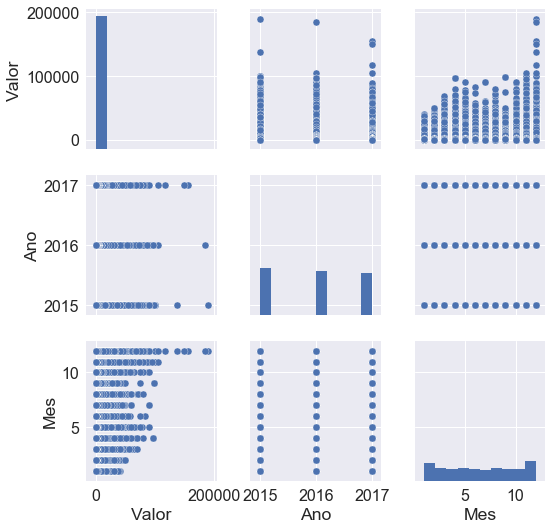

In [6]:
sns.pairplot(df)
plt.show()

/Users/tec/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


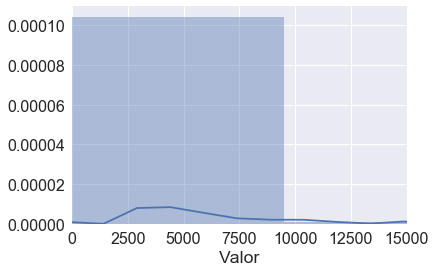

In [7]:
sns.distplot( df["Valor"], bins=20 , norm_hist=False, kde = True)
plt.xlim(0,15000)
plt.show()

***
### Comentários

> - As informações geradas pelo método describe acima indica uma concentração muito alta de valores baixos em R2.141,03.
>
> - Há uma imensa variação de valores entre minimo R0,01 e máximo R189.600,00, própria da variedade dos tipos de gastos existentes no dataset.
>
> - O gráfico de distribuição acima ilustra este fenômeno.

***

## **E. ANÁLISE ESTATÍSTICA GERAL DO TRIÊNIO**

#### Será realizada a análise descritiva dos três anos 2015, 2016 e 2017:
> **E.1** Quantidade de gastos por tipo.
>
> **E.2** Montante de gastos por tipo.
>
> **E.3** Montante de gasto por Partido.
>
> **E.4** Montante de gastos por UF (Unidade Federal).
>
> **E.5** Total de Gastos dos Top3 Deputados de maior gasto no triênio 2015, 2016 e 2017.

### **E.1** Quantidade de gastos por tipo.

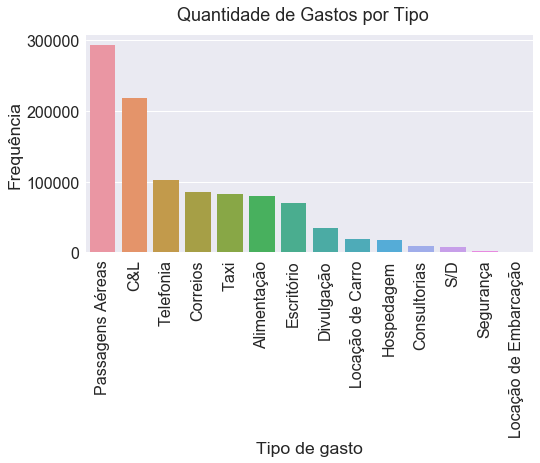

In [8]:
# Variáveis auxiliares para plotar gráficos
data = df
target = 'Tipo'
plt.figure(figsize=(largura,altura))

# Variável com função que ordena as barras em ordem decrescente.
descending_order = data[target].value_counts().sort_values(ascending = False).index
plt.suptitle("Quantidade de Gastos por Tipo", fontsize = fonte)
sns.countplot(data = data, x = target, order = descending_order)
plt.xlabel('Tipo de gasto')
plt.ylabel('Frequência')
plt.xticks(rotation = rota)
plt.show()

In [9]:
top1 = df[df['Tipo'] == 'Passagens Aéreas'].count()
top2 = df[df['Tipo'] == 'C&L'].count()
top3 = df[df['Tipo'] == 'Telefonia'].count()

print('1st: ', top1, '2nd: ', top2, '3rd: ', top3)

1st:  Nome       292919
UF         292615
Partido    292615
Tipo       292919
Valor      292919
Ano        292919
Mes        292919
dtype: int64 2nd:  Nome       217982
UF         217534
Partido    217534
Tipo       217982
Valor      217982
Ano        217982
Mes        217982
dtype: int64 3rd:  Nome       101808
UF         101681
Partido    101681
Tipo       101808
Valor      101808
Ano        101808
Mes        101808
dtype: int64


***
### Comentários

> O gráfico acima expressa a quantidade de despesas submetidas para resgistro de despesas, podemos identificar as três maiores despesas: passagens aéreas, combustíveis e lubrificantes (C&L) e telefonia.
>
> **Releção entre si:**
> - As despesas de Passagens Aéreas representam aproximadamente três vezes o gasto de telefonia, e uma vez e meia os gastos de combustíveis e lubrificantes (C&L).
> - As despezas que estao em posição 4 a 7, juntas representam o primeiro tipo de maior despeza.
> - Chama muito a atenção que os deputados tem mais pedido de reembolso de passagens aéreas que reembolso de uso de Taxi, pedágio e estacionamento, ou mesmo outros meios de transporte.
 
***

### E.2 Montante de Gastos por Tipo

In [10]:
df.head(2)

,Nome,UF,Partido,Tipo,Valor,Ano,Mes
0,ABEL MESQUITA JR.,RR,DEM,Escritório,165.65,2015,11
1,ABEL MESQUITA JR.,RR,DEM,Escritório,59.48,2015,12


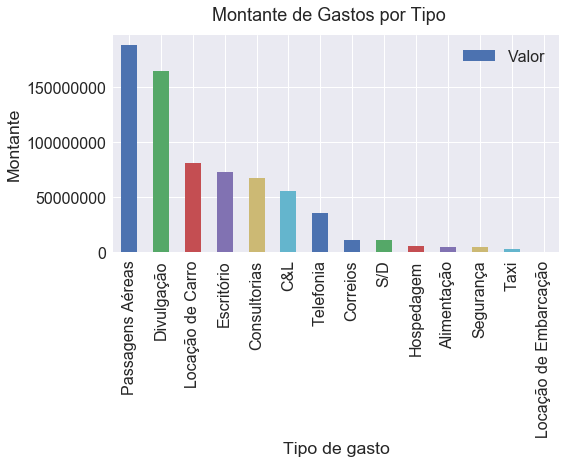

In [11]:
# Impedir eixo y de demonstrar valores em notaçào científica.
plt.ticklabel_format(style = 'plain', axis = 'y')

# Filtrar dataframe df_limpo por 'Tipo de gasto', valores da coluna 'Valor', 
#realiza seu somatório e ordena de de forma descendente.
df_c2 = df.groupby('Tipo')['Valor'].sum().sort_values(ascending=False)

# Plota o gráfico em barras.
df_c2.plot( kind = 'bar', figsize = (largura,altura), rot = rota, sort_columns = True)

plt.xlabel('Tipo de gasto')
plt.ylabel('Montante')

plt.suptitle("Montante de Gastos por Tipo", fontsize = fonte)
plt.legend()
plt.show()

In [12]:
df.groupby('Tipo')['Valor'].sum().sort_values(ascending=False)

Tipo
Passagens Aéreas        187,347,620.89
Divulgação              164,252,043.07
Locação de Carro         81,295,988.82
Escritório               73,168,346.62
Consultorias             66,957,155.69
C&L                      55,771,327.75
Telefonia                35,436,215.33
Correios                 11,718,794.63
S/D                      11,311,221.00
Hospedagem                5,970,442.04
Alimentação               5,311,097.28
Segurança                 5,153,346.90
Taxi                      2,799,935.10
Locação de Embarcação       189,619.16
Name: Valor, dtype: float64

***
### Comentários

> O gráfico acima expressa o montante de gastos por tipo de despesa.
>
> **Releção entre si:**
> - O gasto com despesas relacionadas a passagens aéreas, como esperado, tem o maior montante acumulado. Esta despesa é seguida muito de perto pela despesa com divulgação.
> - A despesa com passagens aéreas definitivamente sobrepuja todas as demais despesas relacionadas a trasnporte.

***

### E.3 Total de Gastos por Partido

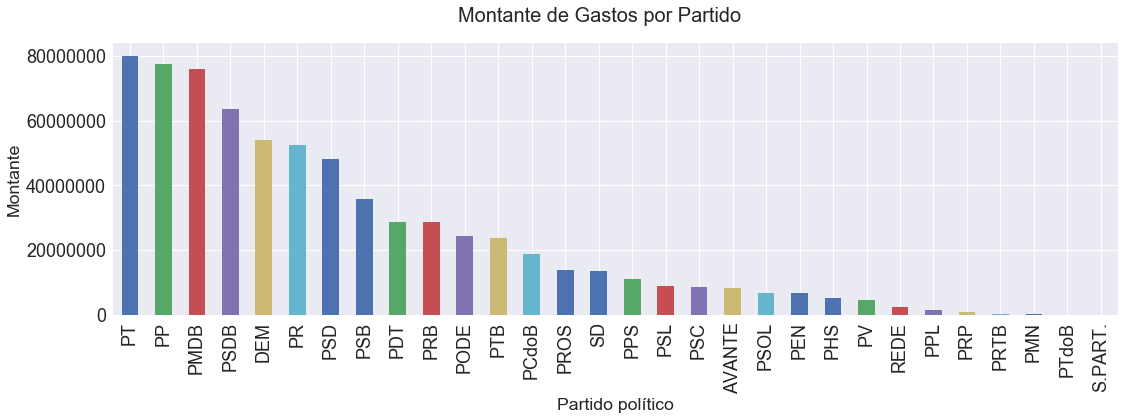

In [13]:
# Impedir eixo y de demonstrar valores em notaçào científica.
plt.ticklabel_format(style = 'plain', axis = 'y')

# Filtrar dataframe df_limpo por 'Tipo de gasto', valores da coluna 'Valor', 
#realiza seu somatório e ordena de de forma descendente.
df_c3 = df.groupby('Partido')['Valor'].sum().sort_values(ascending = False)

# Plota o gráfico em barras.
df_c3.plot( kind = 'bar', figsize = (18,5), rot = rota, sort_columns = True, fontsize = fonte)
plt.suptitle("Montante de Gastos por Partido", fontsize = 20)
plt.xlabel('Partido político')
plt.ylabel('Montante')
plt.show()

***
### Comentários

> O gráfico acima expressa o montante de gastos por partido político.
> É importante entender que há uma proporcionalidade de gastos do partido e a quantidade de deputados.

***

### E.4 Total de Gastos por UF (Unidade Federal)

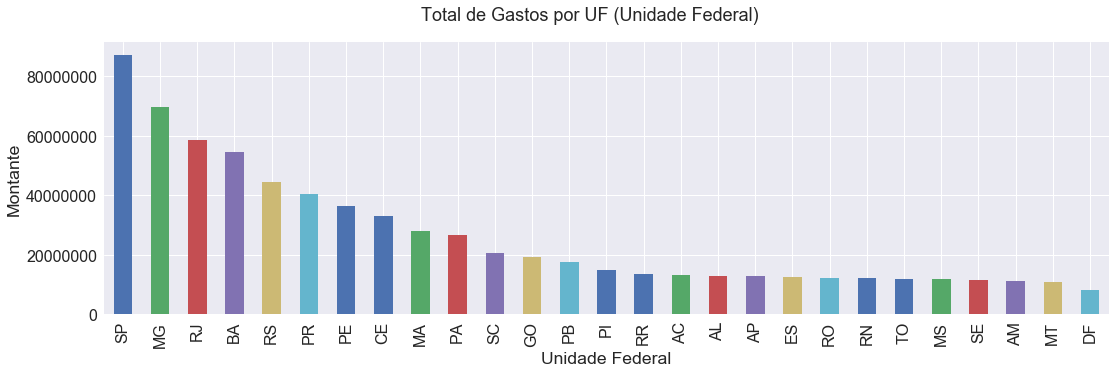

In [14]:
# Impedir eixo y de demonstrar valores em notaçào científica.
plt.ticklabel_format(style='plain', axis='y')

# Filtrar dataframe df_limpo por 'Tipo de gasto', valores da coluna 'Valor', 
# realiza seu somatório e ordena de de forma descendente.
df_c4 = df.groupby('UF')['Valor'].sum().sort_values(ascending = False)

# Plota o gráfico em barras.
df_c4.plot( kind = 'bar', figsize = (18,5), rot=rota, sort_columns = True)
plt.suptitle("Total de Gastos por UF (Unidade Federal)", fontsize = fonte)
plt.xlabel('Unidade Federal')
plt.ylabel('Montante')
plt.show()

# ***
### Comentários

> O gráfico acima, semelhantemente ao gráfico de gastos por partido, tem seu montante de gastos proporcionais a quantidade de deputados por UF.
***

## F - ANÁLISE ESTATÍSTICA ESPECÍFICA DE DEPUTADOS
Estaremos realizando a análise estatística dos deputados top 3 de gasto no triênio. Como demonstrado em F.1 os três deputados de maior gasto no triênio são:
> - 1. Francisco Chapadinha
> - 2. Edio Lopes
> - 3. Domingos Neto.

***
## TOP 3 DEPUTADOS

***
### F.1 Top 3 Deputados no triênio (2015, 2016 e 2017)

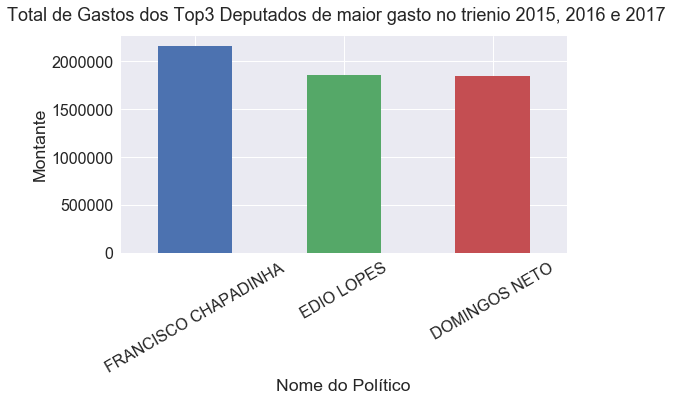

In [15]:
# Total de Gastos dos Top3 Deputados de maior gasto no triênio 2015, 2016 e 2017.
# rota = 0
df_trio = df.groupby('Nome')['Valor'].sum().sort_values(ascending = False).head(3)
df_trio.plot(kind = 'bar', figsize = (largura,altura), rot = 30)
plt.suptitle("Total de Gastos dos Top3 Deputados de maior gasto no trienio 2015, 2016 e 2017", fontsize = fonte)
plt.xlabel('Nome do Político')
plt.ylabel('Montante')

plt.show()


***
### Comentários

> O gráfico expressa os valores totais de gastos dos três maiores dispêndios dentro da camara dos deputados.
> Édio Lopes e Domingos Neto tem os gastos totais com valores muito semelhantes.
***

### F.2 Top 3 deputados por Tipo de Gasto

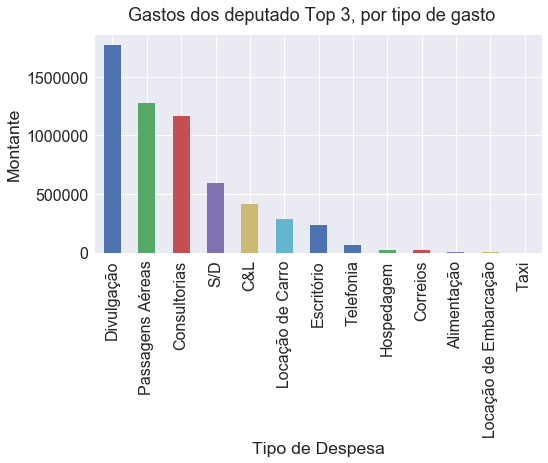

In [16]:
# Definindo dataframe com of top3 deputados
df_top3 = df[(df['Nome'] == 'EDIO LOPES') | \
                   (df['Nome'] == 'FRANCISCO CHAPADINHA') |  \
                   (df['Nome'] == 'DOMINGOS NETO')]

# Agrupando o dataframe df_top3 pelo feature 'Tipo de gasto', somando a coluna'Valor'
# ordenando os valores de forma descendente, em seguida ploto o gráfico.

df_top3.groupby('Tipo')['Valor'].sum().sort_values(ascending=False).\
plot( kind = 'bar', figsize = (largura,altura), rot = rota, sort_columns = True)
plt.suptitle("Gastos dos deputado Top 3, por tipo de gasto", fontsize = fonte)
plt.xlabel('Tipo de Despesa')
plt.ylabel('Montante')
plt.show()

***
### Comentários

> O gráfico acima ilustra os tipos de despesas realizados.
>
> **Releção entre si:**
> - O gasto tem um comportamento distinto do apresentado na análise geral de gastos. Pasagens aéreas que representavam notoriamente o maior gasto, neste caso ficou em terceiro lugar comm menos da metade do primeiro colocado: divulgação.
***

## DEPUTADO FRANCISCO CHAPADINHA

Criação do dataset com os dados de Francisco Chapadinha.

In [17]:
# Criação de dataframe com o dep. Fco Chapadinha
df_fco = df[(df['Nome'] == 'FRANCISCO CHAPADINHA')]

In [18]:
df_fco.head(3)

,Nome,UF,Partido,Tipo,Valor,Ano,Mes
126728,FRANCISCO CHAPADINHA,PA,PODE,Escritório,"4,200.00",2015,10
126729,FRANCISCO CHAPADINHA,PA,PODE,Escritório,"4,200.00",2015,11
126730,FRANCISCO CHAPADINHA,PA,PODE,Escritório,"4,200.00",2015,12


### F.3 Dep. Francisco Chapadinha - Gastos totais por tipo no triênio

In [19]:
# Agrupando os gastos por ano
df_fco_2015 = pd.DataFrame(df_fco[df_fco["Ano"] == 2015].groupby('Tipo')['Valor'].sum())
df_fco_2016 = pd.DataFrame(df_fco[df_fco["Ano"] == 2016].groupby('Tipo')['Valor'].sum())
df_fco_2017 = pd.DataFrame(df_fco[df_fco["Ano"] == 2017].groupby('Tipo')['Valor'].sum())

# Criando o dataframe que receberá os dados finais
df_fco_trienio = df_fco_2015

# Renomeando a coluna
df_fco_trienio.rename(columns = {'Valor': 'Valor 2015'}, inplace = True)

# Adicionando o conteúdo de cada dataframe no Dataframe final
df_fco_trienio['Valor 2016'] = df_fco_2016['Valor']
df_fco_trienio['Valor 2017'] = df_fco_2017['Valor']

df_fco_trienio

,Valor 2015,Valor 2016,Valor 2017
Tipo,,,
Alimentação,"5,419.78","1,611.84",155.00
C&L,"48,861.60","76,274.71","61,886.17"
Correios,"3,926.35","5,301.12","7,773.08"
Divulgação,"459,300.00","443,500.00","273,120.00"
Escritório,"50,997.48","21,241.80",676.76
Hospedagem,"3,314.99",971.02,"9,522.46"
Passagens Aéreas,"54,519.40","68,983.64","80,912.88"
S/D,"51,900.00","107,000.00","238,000.00"
Taxi,17.50,27.00,nan


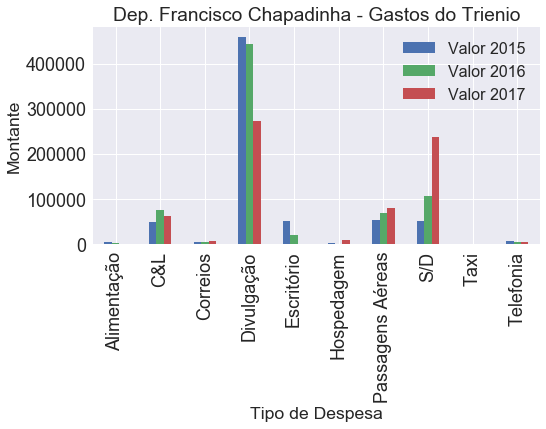

In [20]:
# Variáveis para definição de dimensões e rotação do gráfico.

df_fco_trienio.plot(kind = 'bar', title='Dep. Francisco Chapadinha - Gastos do Trienio' , fontsize=fonte, figsize=(largura,altura), subplots = False, legend = True)
plt.xlabel('Tipo de Despesa')
plt.ylabel('Montante')
plt.show()

***
### Comentários

> O gráfico acima expressa uma comparação de gastos por tipo de despesa do Dep. Francisco Chapadinha.
>
> - Há uma queda significativa de valores relacionados a divulgação, o aumento suave dos gastos com passagens aéreas, e o aumento de gastos S/D (sem descrição).
> - É possível que queda com gastos de divulgação estejam distorcidos em detrimento de lançamento de parte destes gastos em S/D.
***

### F.4 Dep. Francisco Chapadinha - Total, Média e Máxima de Gastos

In [21]:
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

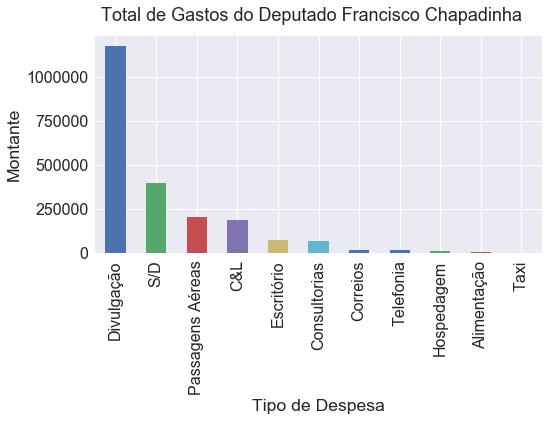

In [22]:
# Análise de gastos do Deputado Francisco Chapadinha.
df_fco_sum = df[df['Nome'] == 'FRANCISCO CHAPADINHA'].groupby('Tipo').Valor.sum().sort_values(ascending = False)
plt.figure(figsize = (largura,altura))
df_fco_sum.plot(kind = 'bar')
plt.suptitle("Total de Gastos do Deputado Francisco Chapadinha", fontsize = fonte)
plt.xlabel('Tipo de Despesa')
plt.ylabel('Montante')
plt.show()

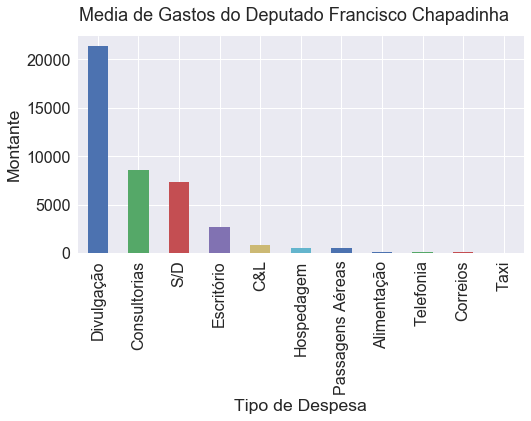

In [23]:
# Análise de gastos do Deputado Francisco Chapadinha.
df_fco_mean = df[df['Nome'] == 'FRANCISCO CHAPADINHA'].groupby('Tipo').Valor.mean().sort_values(ascending = False)
plt.figure(figsize = (largura,altura))

df_fco_mean.plot(kind = 'bar')
plt.suptitle("Media de Gastos do Deputado Francisco Chapadinha", fontsize = fonte)
plt.xlabel('Tipo de Despesa')
plt.ylabel('Montante')
plt.show()

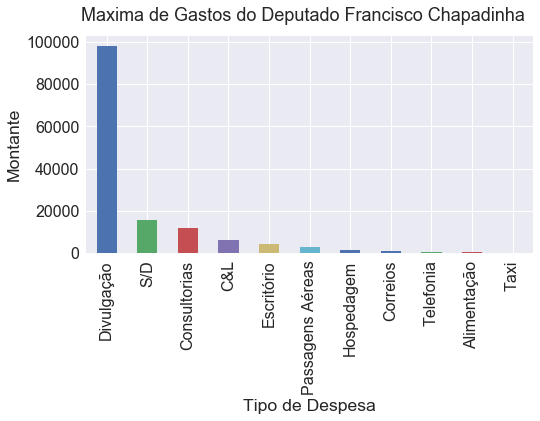

In [24]:
# Análise de gastos do Deputado Macedo.
df_fco_max = df[df['Nome'] == 'FRANCISCO CHAPADINHA'].groupby('Tipo').Valor.max().sort_values(ascending = False)
plt.figure(figsize = (largura,altura))

df_fco_max.plot(kind = 'bar')
plt.suptitle("Maxima de Gastos do Deputado Francisco Chapadinha", fontsize = fonte)
plt.xlabel('Tipo de Despesa')
plt.ylabel('Montante')
plt.show()

***
### Comentários

> O gráfico acima expressa a média e máxima de gastos por tipo de despesa do dep. Francisco Chapadinha.
>S/D:
> - O gráfico com a indicação de valor máximo de despesa tem em sua segunda posição gastos sem descrição (S/D).
> - S/D ocupa a terceira posição de gastos médios.
> - Gastos S/D (sem descrição) dificultam muito a análise de gastos dos deputados.
***

## DEPUTADO EDIO LOPES

Criação do dataset com os dados de Edio Lopes.

In [25]:
# Criação de dataframe com o dep. Edio Lopes
df_edi = df[(df['Nome'] == 'EDIO LOPES')]

### F.5 Dep. Edio Lopes - Gastos totais por tipo no triênio

In [26]:
# Agrupando os gastos por ano
df_edi_2015 = pd.DataFrame(df_edi[df_edi["Ano"] == 2015].groupby('Tipo')['Valor'].sum())
df_edi_2016 = pd.DataFrame(df_edi[df_edi["Ano"] == 2016].groupby('Tipo')['Valor'].sum())
df_edi_2017 = pd.DataFrame(df_edi[df_edi["Ano"] == 2017].groupby('Tipo')['Valor'].sum())

# Criando o dataframe que receberá os dados finais
df_edi_trienio = df_edi_2015
# Renomeando a coluna
df_edi_trienio.rename(columns = {'Valor': 'Valor 2015'}, inplace = True)

# Adicionando o conteúdo de cada dataframe no Dataframe final
df_edi_trienio['Valor 2016'] = df_edi_2016['Valor']
df_edi_trienio['Valor 2017'] = df_edi_2017['Valor']

df_edi_trienio

,Valor 2015,Valor 2016,Valor 2017
Tipo,,,
Alimentação,114.31,609.63,nan
C&L,"53,851.05","50,075.65","39,958.11"
Consultorias,"21,227.10",nan,nan
Correios,"1,864.49",917.37,416.18
Divulgação,"59,720.00","146,000.00","173,850.00"
Escritório,"85,500.00","40,963.60","33,000.00"
Hospedagem,"4,618.70","1,930.49","3,186.88"
Locação de Carro,"88,023.68","112,051.17","78,596.00"
Locação de Embarcação,"5,500.00",nan,nan


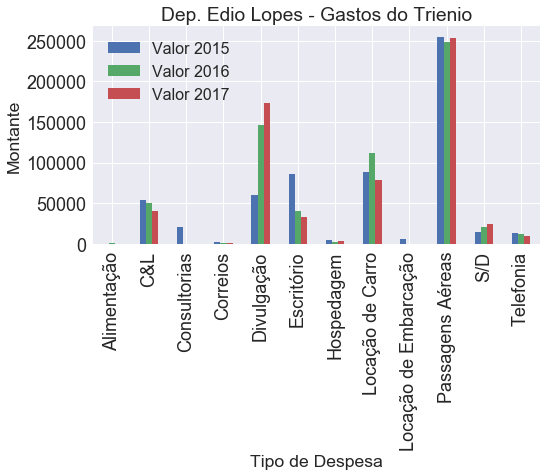

In [27]:
df_edi_trienio.plot(kind = 'bar', title = 'Dep. Edio Lopes - Gastos do Trienio', figsize = (largura,altura), fontsize = fonte)
plt.xlabel('Tipo de Despesa')
plt.ylabel('Montante')
plt.show()

***
### Comentários

> O gráfico acima expressa uma comparação de gastos por tipo de despesa do Dep. Edio Lopes dentro do triênio.
>
> - O que chama atenção neste gráfico é a distrinuição, mesmo que pequena, em outras despesas.
> - Os gastos com veículo auto-motor e passagens aéreas são crescentes.
> - Gastos com C&L, escritório e hospedagem tem comportamentos de aumento discreto e similares.
> - Gastos com divulgação tiveram um pico no ano de 2016.

### F.6 Dep. Edio Lopes - Total, Média e Máxima de Gastos

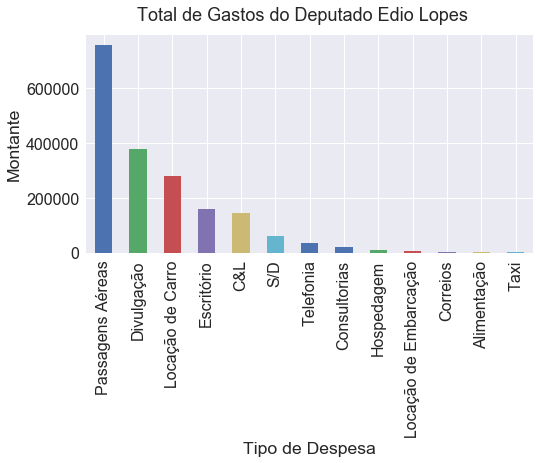

In [28]:
# Análise de gastos do Deputado Macedo.
df_edi_sum = df[df['Nome'] == 'EDIO LOPES'].groupby('Tipo').Valor.sum().sort_values(ascending = False)
plt.figure(figsize = (largura,altura))

df_edi_sum.plot(kind = 'bar')
plt.suptitle("Total de Gastos do Deputado Edio Lopes", fontsize = fonte)
plt.xlabel('Tipo de Despesa')
plt.ylabel('Montante')
plt.show()

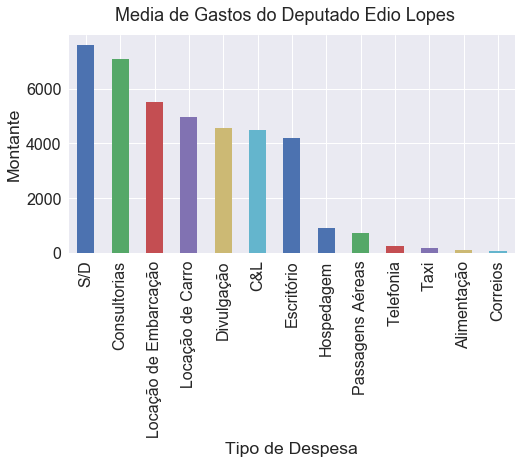

In [29]:
# Análise de gastos do Deputado Macedo.
df_edi_mean = df[df['Nome'] == 'EDIO LOPES'].groupby('Tipo').Valor.mean().sort_values(ascending = False)
plt.figure(figsize=(largura,altura))
df_edi_mean.plot(kind = 'bar')
plt.suptitle("Media de Gastos do Deputado Edio Lopes", fontsize = fonte)
plt.xlabel('Tipo de Despesa')
plt.ylabel('Montante')
plt.show()

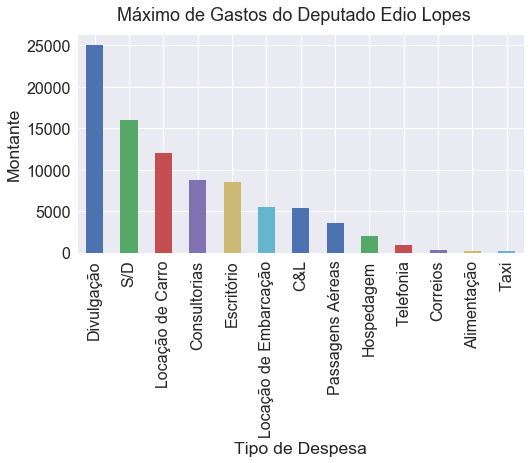

In [30]:
# Análise de gastos do Deputado Macedo.
df_edi_max = df[df['Nome'] == 'EDIO LOPES'].groupby('Tipo').Valor.max().sort_values(ascending = False)
plt.figure(figsize = (largura,altura))
df_edi_max.plot(kind='bar')
plt.suptitle("Máximo de Gastos do Deputado Edio Lopes", fontsize = fonte)
plt.xlabel('Tipo de Despesa')
plt.ylabel('Montante')
plt.show()

***
### Comentários

> O gráfico acima expressa a média e máxima de gastos por tipo de despesa do dep. Edio Lopes
>
> - Os gastos do deputado ficaram bem distribuidas em ambos gráficos.
> - Mais uma vez a despesa sem descrição ocupa grande destaque. S/D ocupa primeiro lugar na média de gastos e segundo lugar entre os gastos mais altos.

***

## DEPUTADO DOMINGOS NETO

Criação do dataset com os dados de Domingos Neto.

In [31]:
# Criação de dataframe com o dep. Domingos Neto.
df_dom = df[(df['Nome'] == 'DOMINGOS NETO')]

### F.7 Dep. Domingos Neto - Gastos totais por tipo no triênio

In [32]:
# Agrupando os gastos por ano
df_dom_2015 = pd.DataFrame(df_dom[df_dom["Ano"] == 2015].groupby('Tipo')['Valor'].sum())
df_dom_2016 = pd.DataFrame(df_dom[df_dom["Ano"] == 2016].groupby('Tipo')['Valor'].sum())
df_dom_2017 = pd.DataFrame(df_dom[df_dom["Ano"] == 2017].groupby('Tipo')['Valor'].sum())

# Criando o dataframe que receberá os dados finais
df_dom_trienio = df_dom_2015
# Renomeando a coluna
df_dom_trienio.rename(columns = {'Valor': 'Valor 2015'}, inplace = True)

# Adicionando o conteúdo de cada dataframe no Dataframe final
df_dom_trienio['Valor 2016'] = df_dom_2016['Valor']
df_dom_trienio['Valor 2017'] = df_dom_2017['Valor']

df_dom_trienio

,Valor 2015,Valor 2016,Valor 2017
Tipo,,,
C&L,"15,222.61","35,187.35","35,614.02"
Consultorias,"402,000.00","240,000.00","432,000.00"
Correios,165.98,211.84,451.67
Divulgação,"31,520.00","113,740.00","65,000.00"
Hospedagem,706.54,nan,nan
Passagens Aéreas,"116,502.36","63,781.77","134,878.66"
S/D,"2,700.00","92,200.00","41,180.00"
Telefonia,"10,089.76","4,466.50","2,129.39"


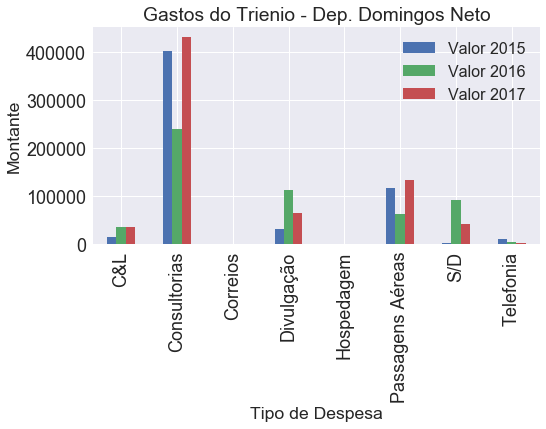

In [33]:
df_dom_trienio.plot(kind = 'bar', title = 'Gastos do Trienio - Dep. Domingos Neto', figsize = (largura,altura), fontsize = fonte)
plt.xlabel('Tipo de Despesa')
plt.ylabel('Montante')
plt.show()

***
### Comentários

> O gráfico acima expressa uma comparação de gastos por tipo de despesa do Dep. Domingos Neto.
>
> - Há uma significativa oscilação de valores de gastos na qual os gastos com consultorias e passagens aéreas tiveram o mesmo comportamento, assim como diculgação e S/D tiveram comportamento similares.
***

### F.8 Dep. Domingos Neto - Total, Média e Máxima de Gastos

### Total de Gastos

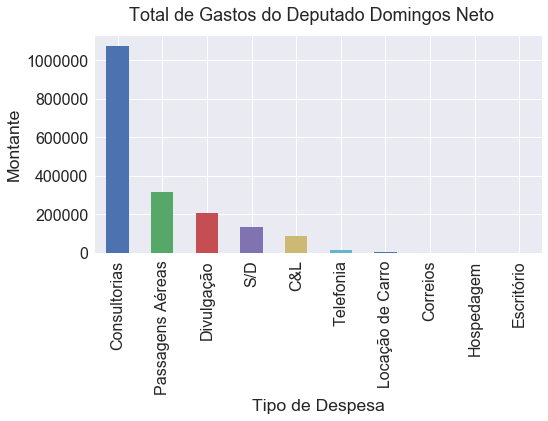

In [34]:
# Análise de gastos do Deputado Macedo.
df_dom_sum = df[df['Nome'] == 'DOMINGOS NETO'].groupby('Tipo').Valor.sum().sort_values(ascending=False)
plt.figure(figsize=(largura,altura))
df_dom_sum.plot(kind='bar')
plt.suptitle("Total de Gastos do Deputado Domingos Neto", fontsize = fonte)
plt.xlabel('Tipo de Despesa')
plt.ylabel('Montante')
plt.show()

### Média de gastos

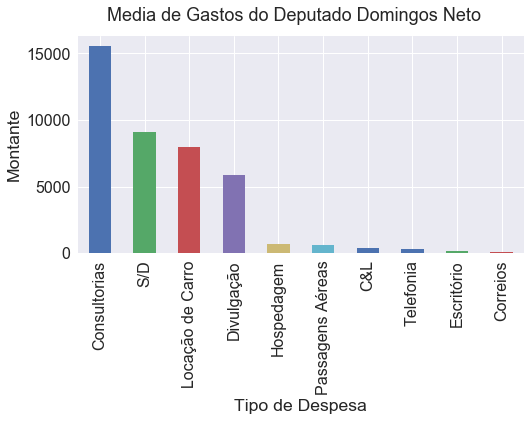

In [35]:
# Análise de gastos do Deputado Macedo.
df_dom_mean = df[df['Nome'] == 'DOMINGOS NETO'].groupby('Tipo').Valor.mean().sort_values(ascending=False)
plt.figure(figsize=(largura,altura))
df_dom_mean.plot(kind='bar')
plt.suptitle("Media de Gastos do Deputado Domingos Neto", fontsize = fonte)
plt.xlabel('Tipo de Despesa')
plt.ylabel('Montante')
plt.show()

### Máxima de gastos

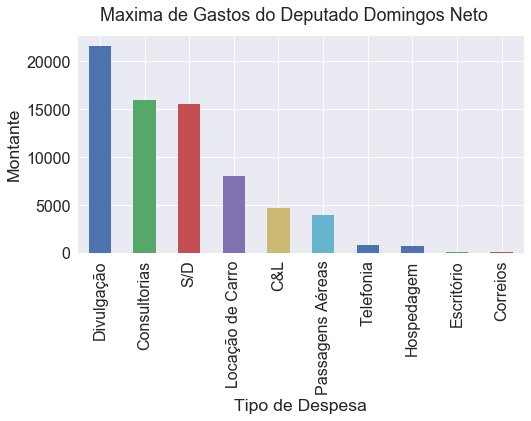

In [36]:
# Análise de gastos do Deputado Macedo.
df_dom_max = df[df['Nome'] == 'DOMINGOS NETO'].groupby('Tipo').Valor.max().sort_values(ascending=False)
plt.figure(figsize=(largura,altura))
df_dom_max.plot(kind='bar')
plt.suptitle("Maxima de Gastos do Deputado Domingos Neto", fontsize = fonte)
plt.xlabel('Tipo de Despesa')
plt.ylabel('Montante')
plt.show()

***
### Comentários

> O gráfico acima expressa a média e máxima de gastos por tipo de despesa do dep. Domingues Neto
>
> - Os gastos médios e máximos tem os mesmos quatro itens envolvidos, com troca de posições.
> - Mas o que chama mais atenção é o gasto S/D, ou seja, sem descrição, com valor m;aximo expressivo de R$ 16.000,00.
***

 ***
# EXPORTAÇÃO DE DATASETS PARA PREDIÇÃO

***
## **G. DEFINIÇÃO DE DEPUTADOS TOP 3 2017 PARA PREDIÇÃO 2018**
Vamos verificar quais são os top 3 deputados que mais gastaram em 2017. A partir destes candidatos realizaremos o cálculo preditivo de gastos deles para 2018 utilizando-se dos dados do triênio 2015, 2016 e 2017.
Para utilizarmos estes datasets estaremos exportando os dados para arquivo CSV relativo a cada deputado.

### **G.1 Listagem dos Top 3 deputados de 2017**
Iremos filtrar o dataset total já tratado até o momento para realizarmos a definição dos deputados top 3 de 2017.

In [37]:
# Definição de Dataset de 2017.
df_2017_limpo = df[df['Ano'] == 2017]
df_2017_limpo.head(2)

,Nome,UF,Partido,Tipo,Valor,Ano,Mes
699377,ABEL MESQUITA JR.,RR,DEM,Escritório,296.00,2017,4
699378,ABEL MESQUITA JR.,RR,DEM,Escritório,175.00,2017,10


In [38]:
# Cálculo de somatório de gastos por deputado, elencado de forma decrescente 
# e filtrado por head(3) - df_trio_list_2017
df_top3_2017 = df_2017_limpo.groupby('Nome')['Valor'].sum().\
sort_values(ascending=False).head(3)
df_top3_2017

Nome
DOMINGOS NETO          711,253.74
FRANCISCO CHAPADINHA   689,002.06
ROCHA                  650,980.09
Name: Valor, dtype: float64

#### **Os deputados Top 3 de 2017 para previsão de gastos em 2018 são:**
> 1. DOMINGOS NETO
> 2. FRANCISCO CHAPADINHA
> 3. ROCHA

### G.2 Dep. Domingos Neto - Exportação de dataset 

In [39]:
df_dom = df[(df['Nome'] == 'DOMINGOS NETO')]
# Agrupando os gastos por ano
df_dom_2015 = pd.DataFrame(df_dom[df_dom["Ano"] == 2015].groupby('Tipo')['Valor'].sum())
df_dom_2016 = pd.DataFrame(df_dom[df_dom["Ano"] == 2016].groupby('Tipo')['Valor'].sum())
df_dom_2017 = pd.DataFrame(df_dom[df_dom["Ano"] == 2017].groupby('Tipo')['Valor'].sum())

# Adicionando a coluna Ano
df_dom_2015['Ano'] = 2015
df_dom_2016['Ano'] = 2016
df_dom_2017['Ano'] = 2017

# Concatenando os dataframes e resetando o index
df_dom_con = pd.concat([df_dom_2015, df_dom_2016, df_dom_2017], sort=True)
df_dom_con = df_dom_con.reset_index()
df_dom_con.head(3)

,Tipo,Ano,Valor
0,C&L,2015,"15,222.61"
1,Consultorias,2015,"402,000.00"
2,Correios,2015,165.98


In [40]:
# Exportando para uso na fase de predição
df_dom_con.to_csv('./dataset/df_dom_con.csv', index=False, sep=';', encoding = 'latin1') 
print('df_dom_con.csv exportado com sucesso!')

df_dom_con.csv exportado com sucesso!


### G.3 Dep. Francisco Chapadinha - Exportação de dataset

In [41]:
df_fco = df[(df['Nome'] == 'FRANCISCO CHAPADINHA')]
# Agrupando os gastos por ano
df_fco_2015 = pd.DataFrame(df_fco[df_fco["Ano"] == 2015].groupby('Tipo')['Valor'].sum())
df_fco_2016 = pd.DataFrame(df_fco[df_fco["Ano"] == 2016].groupby('Tipo')['Valor'].sum())
df_fco_2017 = pd.DataFrame(df_fco[df_fco["Ano"] == 2017].groupby('Tipo')['Valor'].sum())

# Adicionando a coluna Ano
df_fco_2015['Ano'] = 2015
df_fco_2016['Ano'] = 2016
df_fco_2017['Ano'] = 2017

# Concatenando os dataframes e resetando o index
df_fco_con = pd.concat([df_fco_2015, df_fco_2016, df_fco_2017], sort=True)
df_fco_con = df_fco_con.reset_index()
df_fco_con.head(3)

,Tipo,Ano,Valor
0,Alimentação,2015,"5,419.78"
1,C&L,2015,"48,861.60"
2,Correios,2015,"3,926.35"


In [42]:
# Exportando para uso na fase de predição
df_fco_con.to_csv('./dataset/df_fco_con.csv', index=False, sep=';', encoding = 'latin1')
print('df_fco_con.csv exportado com sucesso!')

df_fco_con.csv exportado com sucesso!


###  G.4 Dep. Rocha - Exportação de dataset 

In [43]:
# Criação de dataframe com o dep. Rocha
df_roc = df[(df['Nome'] == 'ROCHA')]
# Agrupando os gastos por ano
df_roc_2015 = pd.DataFrame(df_roc[df_roc["Ano"] == 2015].groupby('Tipo')['Valor'].sum())
df_roc_2016 = pd.DataFrame(df_roc[df_roc["Ano"] == 2016].groupby('Tipo')['Valor'].sum())
df_roc_2017 = pd.DataFrame(df_roc[df_roc["Ano"] == 2017].groupby('Tipo')['Valor'].sum())

# Adicionando a coluna Ano
df_roc_2015['Ano'] = 2015
df_roc_2016['Ano'] = 2016
df_roc_2017['Ano'] = 2017

# Concatenando os dataframes e resetando o index
df_roc_con = pd.concat([df_roc_2015, df_roc_2016, df_roc_2017])
df_roc_con = df_roc_con.reset_index()

# Alterando a posição da coluna Valor.
v = df_roc_con.pop('Valor')
df_roc_con['Valor']= v

In [44]:
df_roc_con.shape

(33, 3)

In [45]:
df_roc_con.describe

<bound method NDFrame.describe of                 Tipo   Ano      Valor
0        Alimentação  2015   7,207.45
1                C&L  2015  44,022.56
2       Consultorias  2015  11,800.00
3           Correios  2015   1,109.69
4         Divulgação  2015 165,993.33
5         Escritório  2015   6,911.89
6         Hospedagem  2015   8,029.87
7   Locação de Carro  2015  16,739.55
8   Passagens Aéreas  2015 173,054.25
9                S/D  2015  13,500.00
10         Telefonia  2015  15,227.79
11       Alimentação  2016   3,505.23
12               C&L  2016  49,546.45
13          Correios  2016   3,808.46
14        Divulgação  2016 310,900.00
15        Escritório  2016  11,112.06
16        Hospedagem  2016  10,765.09
17  Locação de Carro  2016  66,982.63
18  Passagens Aéreas  2016 200,279.45
19               S/D  2016  17,471.07
20              Taxi  2016     738.28
21         Telefonia  2016  17,552.88
22       Alimentação  2017     926.06
23               C&L  2017  50,002.27
24      Consulto

In [46]:
# Exportando para uso na fase de predição
df_roc_con.to_csv('./dataset/df_roc_con.csv', index=False, sep=';', encoding = 'latin1')
print('df_roc_con.csv exportado com sucesso!')

df_roc_con.csv exportado com sucesso!


In [47]:
display(os.listdir('dataset'))

['.DS_Store',
 'Ano-2015.csv',
 'Ano-2016.csv',
 'Ano-2017.csv',
 'df_dom_con.csv',
 'df_fco_con.csv',
 'df_roc_con.csv',
 'df_trienio_limpo.csv']

### G.5 Análises de distribuição dos Deputados top 3 de 2017

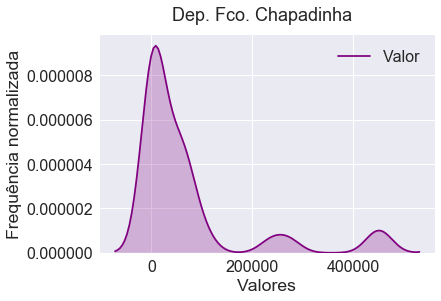

In [48]:
sns.kdeplot(df_fco_con['Valor'], color = 'purple', shade = True)

plt.suptitle("Dep. Fco. Chapadinha", fontsize = fonte)
plt.xlabel('Valores')
plt.ylabel('Frequência normalizada')
#plt.xlim(0,15000)
plt.show()

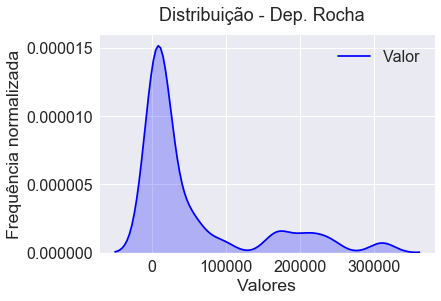

In [49]:
sns.kdeplot(df_roc_con['Valor'], color = 'blue', shade = True)

plt.suptitle("Distribuição - Dep. Rocha", fontsize = fonte)
plt.xlabel('Valores')
plt.ylabel('Frequência normalizada')
#plt.xlim(0,15000)
plt.show()

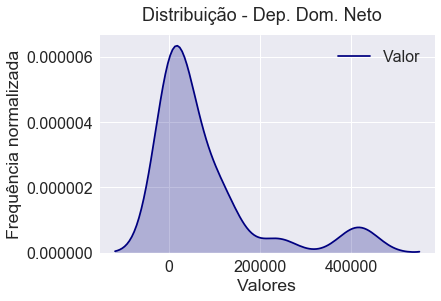

In [50]:
sns.kdeplot(df_dom_con['Valor'], color = 'navy', shade = True, )

plt.suptitle("Distribuição - Dep. Dom. Neto", fontsize = fonte)
plt.xlabel('Valores')
plt.ylabel('Frequência normalizada')
#plt.xlim(0,15000)
plt.show()

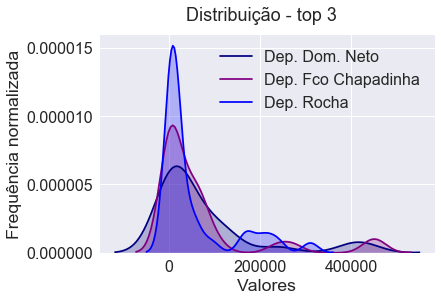

In [51]:
sns.kdeplot(df_dom_con['Valor'], color = 'navy', shade = True, label = 'Dep. Dom. Neto')
sns.kdeplot(df_fco_con['Valor'], color = 'purple', shade = True, label = 'Dep. Fco Chapadinha')
sns.kdeplot(df_roc_con['Valor'], color = 'blue', shade = True, label = 'Dep. Rocha')

plt.suptitle("Distribuição - top 3", fontsize = fonte)
plt.xlabel('Valores')
plt.ylabel('Frequência normalizada')
#plt.xlim(0,15000)
plt.show()

In [52]:
df_dom_con.describe()

,Ano,Valor
count,24.00,24.00
mean,"2,015.96","77,000.54"
std,0.81,"119,900.64"
min,"2,015.00",165.98
25%,"2,015.00","2,557.35"
50%,"2,016.00","33,353.68"
75%,"2,017.00","97,585.00"
max,"2,017.00","432,000.00"


In [53]:
df_fco_con.describe()

,Ano,Valor
count,31.00,31.00
mean,"2,016.00","69,666.77"
std,0.82,"120,495.97"
min,"2,015.00",17.50
25%,"2,015.00","4,441.03"
50%,"2,016.00","12,000.00"
75%,"2,017.00","65,434.91"
max,"2,017.00","459,300.00"


In [54]:
df_roc_con.describe()

,Ano,Valor
count,33.00,33.00
mean,"2,016.00","54,764.79"
std,0.83,"83,640.38"
min,"2,015.00",600.00
25%,"2,015.00","7,207.45"
50%,"2,016.00","11,800.00"
75%,"2,017.00","50,002.27"
max,"2,017.00","310,900.00"
